# Modelos epidemiológicos compartimentais

- Classificação básica de alguns tipos de modelos;

- Breve menção a alguns modelos do compartimentais;

- O modelo SIR em mais detalhes;

- Uma análise matemática do comportamento do modelo SIR;

- Condições para uma situação de epidemia ou não;

- Simulações numéricas do modelo SIR.

In [1]:
using DifferentialEquations
using Plots
using Images

## Tipos de modelos em epidemiologia

Classificação por nível de detalhamento e tipo de interação:

- **compartimental** ou **por compartimento** *(compartment models):* a população é dividida em grandes compartimentos referentes a diferentes estágios da epidemia (suscetíveis, infectados-transmissíveis, recuperados, etc.) e a dinâmica é feita entre os compartimentos, sem detalhamento dos indivíduos que formam cada compartimento.

- **individual** *(individual- or agent-based models):* A população é tratada individualmente, com a interação dada de maneira aleatória entre os indivíduos, segundo determinadas distribuições de probabilidades.

- **em rede** *(network models):* A população é tratada em determinados grupos com características comuns, que compõem diferentes vértices em redes e interagem segundo arestas entre determinados vértices.

## Modelo SIR compartimental

Este é um exemplo clássico de **modelo compartimental**. Tem suas origens nos trabalhos de W. O. Kermack and  A. G. McKendrick (1927, 1932, 1933). É um caso particular de um dos modelos do artigo (1927), que consideravam as taxas de transmissão e de recuperação como sendo dependendes da idade dos indivíduos. Aqui, essas taxas são constantes e todas as idades são tratadas em conjunto.

### Os compartimentos

Neste modelo, a população é definida em três "compartimentos":

- **Suscetíveis** *(susceptible)*

- **Infectados transmissíveis/contagiosos** *(infectious)*

- **Recuperados** e **decessos** (ou **imunes**) *(recovered/removed)*

### Exemplos

O modelo SIR é um bom modelo para certas doenças transmissíveis entre o mesmo tipo de ser-vivo e que conferem imunidade (ou imunidade por um período bem mais longo do que o período de análise da epidemia, por exemplo):

- Catapora (viral, confere imunidade);

- Sarampo (viral, confere imunidade);

- Rubéola (viral, confere imunidade); e

- Coqueluche (bacteriana, confere imunidade duradoura mas não permanente).

### Dinâmica do modelo

Neste modelo, a dinâmica é definida da seguinte forma:

- Os indivíduos suscetíveis podem se tornar infectados ao interagirem de alguma forma com um outro indivíduo infectado contagioso, com o contágio dependendo de uma **taxa de transmissão** $\beta$.

- Os indivíduos infectados tendem a se tornam recuperados, conforme determinado por uma **taxa de recuperação** $\gamma$.

Os parâmetros $\beta$ e $\gamma$ não são totalmente intrínsicos à doença, eles também dependem de padrões de higiene, comportamento social e tratamento dos doentes, por exemplo. Mas há faixas típicas observadas para determinadas doenças.

### Representação do modelo na forma de um dígrafo

![SIR graph](../../../assets/attachments/img/sir_graph.png)

### Representação do modelo na forma de ação de massas

A dinâmica desse modelo é dada por dois processos, conforme mencionado acima, e que podem ser descritos na forma de ação de massas, como em reações químicas e bioquímicas:

$$
\begin{cases}
  S + I \stackrel{\beta}{\rightarrow} 2I, & \text{(processo de infeção)} \\
  I \stackrel{\gamma}{\rightarrow} R, & \text{(processo de recuperação)}.
\end{cases}
$$

## O modelo SIS

Algumas infecções **não criam imunidade** ou criam imunidade por muito pouco tempo. Nesses casos, um indivíduo recuperado torna-se novamente suscetível. Alguns exemplos clássicos de infecções desse tipo são 

- a gripe comum; e

- algumas doenças sexualmente transmissíveis (DST) causados por bactérias, como *gonorréia*, *sífilis*, *clamídia* e *candidíase*.

Neste modelo, a população é definida em dois compartimentos:

- **Suscetíveis**

- **Infectados transmissíveis/contagiosos**

Temos dois parâmetros (positivos) caracterizando o modelo:

- $\beta:$ **taxa de transmissão**

- $\gamma:$ **taxa de recuperação**

Representação do modelo SIS na forma de ação de massas:

$$
\begin{cases}
  S + I \stackrel{\beta}{\rightarrow} 2I, & \text{(processo de infeção)} \\
  I \stackrel{\gamma}{\rightarrow} S, & \text{(processo de recuperação)}.
\end{cases}
$$

Representação do modelo SIS na forma de dígrafo:

![SIS graph](../../../assets/attachments/img/sis_graph.png)

## O modelo SI

Em outras doenças, o indivíduo infectado continua infectado pelo resto da vida e continua transmissor da doença. Um exemplo clássico é a *herpes*. Outro exemplo é o *HIV*.

O único parâmetro relevante é a **taxa de transmissão** $\beta$.

### Representação do modelo SI na forma de ação de massas


$$ S + I \stackrel{\beta}{\rightarrow} 2I. \quad \text{(processo de infeção)}
$$

### Representação do modelo SI na forma de dígrafo

![SI graph](../../../assets/attachments/img/si_graph.png)

## Outros modelos

- **SEIR**, onde E=*exposto*, que já foi infectado mas ainda não é contagioso, para doenças com um longo tempo de incubação, e um novo parâmetro de **latência**:

$$\rm S \rightarrow \rm E \rightarrow \rm I \rightarrow \rm R.
$$

- **SEIS**, onde E=*exposto*: 

$$\rm S \rightarrow \rm E \rightarrow \rm I \rightarrow \rm S.
$$

- **SICR** onde C=*portador*, em que alguns infectados não se tornam recuperados e carregam o vírus pela vida toda, como no caso da *tuberculose*. Os portadores podem, por vezes, voltar a desenvolver os sintomas e se tornar contagioso, passando ao compartimento de infectados, para em seguida retornar ao estado latente:

$$\rm S \rightarrow \rm I \rightarrow \rm R, \qquad \rm I \leftrightarrow \rm C.
$$

- **MSEIR**, onde M=*imunidade temporária de recém-nascido* ("maternally-derived immunity"), como em *sarampo*:

$$\rm M \rightarrow \rm S \rightarrow \rm I \rightarrow \rm R.
$$

- **MSEIRS**, com os recuperados tendo imunidade apenas temporária:

$$\rm M \rightarrow \rm S \rightarrow \rm I \rightarrow \rm R \rightarrow \rm S.
$$

- E vários outros: **SEIRD** (D=Death), **SEIAHR** (A=Asymptomatic, H=Hospitalized, para políticas de saúde), **SELMAHRD** (L=Latent, M=Symptomatic, e.g. H1N1); ver [Yang & Hsu (2012)](#Referências).

- No caso do Covid-19, um grupo de chineses ([Jia et al (2020)](#Referências) considerou, ainda, um modelo do tipo **SEIRQAD** (Q=Quarantined, D=Diagnosed).

## Variações

### O modelo SIS com vitalidade

Neste caso, nascimentos e mortes são consideradas. No caso mais simples, assume-se que

- Os **recém-nascidos** nascem suscetíveis, com uma taxa de crescimento específico $\nu$

- As **mortes** são igualmente proporcionais em todos os compartimentos, com uma taxa de mortalidade específica $\mu$.

$$
\begin{cases}
  N \stackrel{\nu}{\rightarrow} S, & \text{(nascimento entre a população total)} \\
  S + I \stackrel{\beta}{\rightarrow} 2I, & \text{(processo de infeção)} \\
  I \stackrel{\gamma}{\rightarrow} S, & \text{(processo de recuperação)} \\
  S \stackrel{\mu}{\rightarrow} M, & \text{(mortalidade entre os suscetíveis)} \\
  I \stackrel{\mu}{\rightarrow} M, & \text{(mortalidade entre os infectados)}
\end{cases}
$$

### Modelo SIR com vitalidade e vacinação

Há vários modelos incluindo estratégias de vacinação. Vamos considerar um modelo simples, proposto por Herbert (2000) e discutido, com obtenção de controle ótimo, em Zaman, Kang & Jung (2008).

Neste caso, a população de indivíduos suscetíveis, em um modelo SIR com vitalidade, é imunizada a uma taxa específica $u$, levando a um sistema de processos

$$ \begin{cases}
     \rm N \stackrel{\nu}{\rightarrow} \rm S, & \text{(natalidade)} \\
     \rm S + \rm I \stackrel{\beta}{\rightarrow} \rm I, & \text{(infecção)} \\
     \rm I \stackrel{\gamma}{\rightarrow} \rm R, & \text{(recuperação)} \\
     \rm S \stackrel{\nu}{\rightarrow} M, & \text{(mortalidade entre os suscetíveis)} \\ 
     \rm I \stackrel{\nu}{\rightarrow} M, & \text{(mortalidade entre os infectados)} \\
     \rm R \stackrel{\nu}{\rightarrow} M, & \text{(mortalidade entre os recuperados)} \\
     \rm S \stackrel{u}{\rightarrow} R, & \text{(imunização por vacinação dos suscetíveis)}
   \end{cases}
$$

onde $M$ é o número de **óbitos**, $N=S+I+R$ é a **população total**, que é constante, visto que a taxa de mortalidade é igual à taxa de natalidade $\nu$.

## Equações diferenciais do modelo SIR

O próximo passo é implementar o sistema de equações diferenciais para cada compartimento SIR.

### Os compartimentos

Definimos

- $S = $ número de indivíduos **suscetíveis**;

- $I = $ número de indivíduos **infectados**;

- $R = $ número de indivíduos **recuperados**;

A **população**, formada pelo **número total de indivíduos**, é dada por

$$ N = S + I + R
$$

### Sistema em termos do número total de indivíduos em cada compartimento

Temos 

$$ 
  \begin{cases}
    S' = \displaystyle - \beta\frac{I}{N} S, \\
    I' = \displaystyle \beta\frac{I}{N} S - \gamma I, \\
    R' = \gamma I
  \end{cases}
$$

Os parâmetros (positivos) $\beta$, e $\gamma$ têm a seguinte interpretação:

- $\beta:$ **taxa de transmissão**

- $\gamma:$ **taxa de recuperação**

### Dimensões físicas

Partindo da equação diferencial $S' = -\beta IS/N$ e separando a dimensão física de cada termo, temos

$$ \frac{[\mathrm{d}S]}{[\mathrm{d}t]} = [\beta] \frac{[I]}{[N]}[S].
$$

Os termos $[\mathrm{dS}]$ $[S]$, $[I]$ e $[N]$ têm todos a mesma dimensão (número de indivíduos) e se cancelam, enquando que $[\mathrm{d}t]$ tem a mesma dimensão que $[t]$, de forma que ficam restando

$$ [\beta] = \frac{1}{[\mathrm{d}T]} = \frac{1}{T}
$$

Da mesma forma,

$$ \frac{[\mathrm{d}R]}{[\mathrm{d}t]} = [\gamma][I].
$$

Cancelando $[\mathrm{d}R]$ e $[I]$, que têm a mesma dimensão física, nos sobram

$$ [\gamma] = \frac{1}{[\mathrm{d}T]} = \frac{1}{T}
$$

Portanto, ambos têm dimensão inversa do tempo:

$$ [\beta] = [\gamma] = \frac{1}{T}.
$$

Dessa forma, eles representam taxas temporais:

- O parâmetro $\beta$ representa uma taxa de transmissão por unidade de tempo: número de indivíduos contaminados por unidade de tempo por contato entre indivíduos suscetíveis e infectados, por número de suscetíveis.

- O parâmetro $\gamma$ representa uma taxa de recuperação por unidade de tempo: número de indivíduos recuperados por unidade de tempo por número de infectados.

### A taxa de recuperação e o tempo médio de recuperação

O inverso $1/\gamma$ da taxa de recuperação, que tem dimensão física de tempo, é interpretado como o **tempo médio de infecção** ou **tempo médio de recuperação** da doença. De fato, observe que, integrando-se a equação $R'=\gamma I$ em um intervalo $[t, t + 1/\gamma]$, temos que o total de recuperados neste intervalo é igual a média do número de infectados neste mesmo período:

$$ \Delta R = R(t+1/\gamma) - R(t) = \int_t^{t+1/\gamma} R'(s)\;\mathrm{d}s = \gamma \int_t^{t+1/\gamma} I(s)\;\mathrm{d}s = \frac{1}{\frac{1}{\gamma}}\int_t^{t+1/\gamma} I(s)\;\mathrm{d}s = \textrm{média de $I$ no intervalo $[t,t+1/\gamma]$}.
$$

Assim

$$ \gamma \approx \frac{1}{\textrm{tempo médio de infecção}}
$$

### Detalhando a taxa de transmissão

A taxa de transmissão $\beta$ tem dimensão inversa do tempo. Ele pode ser visto como um produto de dois fatores:

$$ \beta = \frac{\textrm{contágios}}{\textrm{contatos}}\frac{\textrm{contatos}}{\textrm{indivíduo} \times \textrm{unidade de tempo}}.
$$

De fato:

1. Suponha que, em média, cada indivíduo tenha um certo número $\kappa$ de **contatos** com outros indivíduos, por unidade de tempo, onde **contatos** são contatos "próximos", com um certo potencial de contágio. Assim,
$$ \kappa = \frac{\textrm{contatos}}{\textrm{indivíduo} \times \textrm{unidade de tempo}}.
$$
1. Como $I/N$ é a fração de infectados (contagiosos) da população, então $\kappa I/N$ desses contatos são com indivíduos contagiosos, por unidade de tempo. 

1. Desses contatos, apenas uma fração $\tau$ acarreta, de fato, em contágio. Mais precisamente, $\tau$ é uma fração de contágios por contato próximo (e.g. a cada 10 contatos próximos, em um deles ocorre o contágio).
$$ \tau = \frac{\textrm{contágios}}{\textrm{contatos}}.
$$
1. Assim, cada indivíduo suscetível tem uma probabilidade $\tau\kappa I/N$ de se infectar, por unidade de tempo.

1. Multiplicando isso pela total da população total de suscetíveis, temos o total de novas infecções por unidade de tempo:
$$  \frac{\textrm{novas infecções}}{\textrm{unidade de tempo}} = \tau\kappa \frac{I}{N} S.
$$
1. Comparando com a equação

$$ I' = \beta\frac{I}{N} S - \gamma I,
$$
que inclui a taxa de recuperação, vemos que 

$$  \beta = \tau\kappa = \frac{\textrm{contágios}}{\textrm{contatos}}\frac{\textrm{contatos}}{\textrm{indivíduo} \times \textrm{unidade de tempo}}.
$$ 


### Exemplo sintético

Digamos que, em uma certa sociedade, cada indivíduo entre em contato próximo com 20 outros indivíduos por dia, sendo que, em média, o contágio de uma determinada doença ocorre em 2% dos contatos próximos. Além disso, essa doença tem, em média, um tempo de cura de 8 dias. Tomando-se 1 dia como unidade de tempo, temos

$$ \tau = 0.02 \,\frac{\textrm{contágios}}{\textrm{contatos}}.
$$

e

$$ \kappa = \frac{20\,\textrm{contatos}}{\textrm{indivíduo} \times \textrm{dia}}.
$$

Assim,
$$ \beta = \tau\kappa = 0.4\,\frac{\textrm{contágios}}{\textrm{indivíduo} \times \textrm{dia}}
$$

e

$$ \gamma = \frac{1}{8\,\textrm{dias}} = \frac{0.125}{\textrm{dia}}
$$

### Força de infecção

- O termo 

$$ \beta \frac{I}{N}S
$$

nos dá a **taxa** de variação temporal do número **total de suscetíveis** que se tornam infectados.

- Dividindo esse termo por $S$, temos a **taxa por indivíduo, por unidade de tempo, pela qual indivíduos suscetíveis se tornam infectados**.

- Esse novo termo é chamado de **força de infecção** (veja, por exemplo, Seção 2.1 de [Keeling & Rohani (2007)](#Referências)):

$$ \lambda = \beta \frac{I}{N}
$$

### Conservação da população

O modelo SIR acima *não inclui natalidade e mortalidade*. Nesse caso, a *população total é conservada*. Podemos conferir que o modelo tem essa propriedade verificando que

$$ \frac{\rm{d}}{\rm{dt}} (S + I + R) = 0.
$$

Observe, ainda, que as equações para $S$ e $I$ estão desacopladas de $R$. Assim, para a evolução da epidemia, podemos considerar apenas o sistema em $S$ e $I$ e deduzir $R$ a partir de $R = N - S - I$, ou seja, evoluimos de acordo com

$$ \begin{cases}
     S' = \displaystyle - \beta\frac{I}{N} S, \\
    I' = \displaystyle \beta\frac{I}{N} S - \gamma I, \\
   \end{cases}
$$

e encontramos $R$ através de

$$ R = N - S - I.
$$

### Representação em termos da densidade de indivíduos

Podemos, também, considerar as densidades de indivíduos (em relação à popuação total) em cada comportamento:

- $s = S/N$ densidade de indivíduos **suscetíveis**;

- $i = I/N$ densidade de indivíduos **infectados**;

- $r = R/N$ densidade de indivíduos **recuperados**.

Nesse caso,

$$ s + i + r = 1
$$

### Sistema em termos da densidade de indivíduos

Basta dividir as equações diferenciais para $S$, $I$ e $R$ por $N$ e substituir as variáveis para obtermos

$$ 
  \begin{cases}
    s' = - \beta si, \\
    i' = \beta si - \gamma i, \\
    r' = \gamma i\\
  \end{cases}
$$

### Análise do sistema e condições para epidemia

Uma situação de **epidemia** é caracterizada pelo **aumento de infectados em um determinado intervalo de tempo**, ou seja
$$ i'> 0.
$$

Olhando o sistema, vemos que 
$$ s' = -\beta s i \leq 0,
$$ 
de modo que $s$ é decrescente, com $s(t) \leq s(0)$, para $t\geq 0$. Em termos da população de individuos suscetíveis, com $S(0)=S_0$, temos

$$ S(t) \leq S_0.
$$

Por sua vez, a proporção de infectados satisfaz 

$$ i' = (\beta s - \gamma)i,
$$ 
de modo que, assumindo  $i$ positivo, temos que $i$ é crescente quando $\beta s > \gamma$ e é decrescente quando $\beta s < \gamma$. Em termos da população de suscetíveis $S=sN$, como $S(t)$ é decrescente, temos que

$$ \textbf{Situação Inicial de Epidemia} \quad \Longleftrightarrow \quad \frac{S_0\beta}{N\gamma} > 1
$$

Como $S_0\leq N$, então, para que haja epidemia, é **necessário** que

$$ \frac{\beta}{\gamma} > 1.
$$

Se essa condição for satisfeita, então a epidemia ocorre se houver pelo menos um infectado transmissível e se a população suscetível for grande o suficiente.

### Número básico de reprodução

O **número básico de reprodução** *(basic reproduction number)*, no caso do modelo SIR, é definido, exatamente, pela condição necessária encontrada acima, i.e.

$$ \mathcal{R}_0 = \frac{\beta}{\gamma}.
$$

Como condições necessárias e suficientes, temos

$$ \mathcal{R}_0 > 1, \quad I_0>0, \quad S_0 > \frac{N}{\mathcal{R_0}}.
$$

Isso, é claro, lembrando que $S + I + R = N$.

Lembrando das interpretações de $\beta$ e $1/\gamma$, vemos que

$$ \begin{align*}
    \mathcal{R}_0 & = \frac{\textrm{\tiny contatos com contágio em potencial}}{\textrm{\tiny contatos}} \times \,\frac{\textrm{\tiny contatos}}{\textrm{\tiny indivíduo} \times \textrm{\tiny unidade de tempo}} \times\,\textrm{\tiny tempo de infecção}.
    \end{align*}
$$

Observe que $\mathcal{R}_0$ é uma quandidade **adimensional**, já que "contatos" tem a dimensão de "indivíduos" e "tempo de infecção" tem unidade de tempo. Isso também segue do fato de $\beta$ e $\gamma$ terem ambos unidade $\texttt{T}^{-1}$.

No exemplo sintético anterior, em que cada indivíduo entre em contato próximo com 20 outros indivíduos por dia, sendo que, em média, o contágio de uma determinada doença ocorre em 1 a cada 50 contatos próximos e a doença tem, em média, um tempo de cura de 8 dias, obtemos

$$ \mathcal{R}_0 = \frac{\tau\kappa}{\gamma} = 3.2\,\frac{\textrm{contágios}}{\textrm{indivíduo}}.
$$

### Exemplos de números básicos de reprodução

Alguns exemplos de $\mathcal{R}_0$:

| doença |  $\mathcal{R}_0$ |
| --- | --- |
| raiva (cachorros - Quênia) | 2.4 |
| influenza (gripe comum) | 3 a 4 |
| rubéola | 6 a 7 |
| catapora | 10 a 12 |
| sarampo | 12 a 18 |

*Fonte: Keeling & Rohani (2007).*

### Controlando ou evitando uma epidemia

Para efeito de política de saúde, podemos reduzir $\mathcal{R}_0$ diminuindo os parâmetros $\beta=\tau\kappa$ e $1/\gamma$

Podemos reduzir $\tau$ com medidas higiênicas, diminuindo as chances de contágio por contato.

Podemos reduzir $\kappa$ com medidas comportamentais, diminuindo os contatos próximos (estes, pelo menos, em momentos de crise, como os atuais, que requerem o distânciamento social).

Podemos reduzir $1/\gamma$ com tratamentos antivirais ou antibacterianos.

Ainda que $\mathcal{R}_0>1$, a política de vacinação é fundamental, reduzindo o número de suscetíveis de tal forma que a desigualdade 

$$ \frac{S}{N}\mathcal{R}_0 < 1
$$

seja confortavelmente satisfeita.

### Interpretação do número básico de reprodução

O número básico de reprodução $\mathcal{R}_0$ pode ser interpretado como o **número de contágios secundários causados por um indivíduo infectado**, pelo menos no caso em que a população suscetível é praticamente a população toda.

De fato, considerando um indivíduo infectado, este irá ter contato com $\kappa S/N$ indívíduos suscetíveis por unidade de tempo e irá contagiar, em média, $\tau\kappa S/N$ indivíduos suscetíveis por unidade de tempo. Como a infecção dura, em média, $1/\gamma$ unidades de tempo, este indivíduo irá contagiar $(\tau\kappa S/N)(1/\gamma)$ indivíduos suscetíveis. No caso em que $S\approx N$, esse número de novas infecções coincide com $\mathcal{R}_0$.

Naturalmente, com essa interpretação, vemos que, quando $\mathcal{R}_0>1$ há um crescimento de casos subsequentes, enquanto que se $\mathcal{R}_0<1$, então há um decrescimento.

### Limite dos suscetíveis

Como $S$ é positivo e estritamente decrescente, então ele converge para um valor 
$$ S_* = \lim_{t\rightarrow \infty} S(t).
$$

Se
$$ S_* \geq \frac{N}{\mathcal{R}_0},
$$
então $I$ é estritamente crescente, pois
$$ I' = \left(\frac{\beta S}{N} - \gamma\right) I > \gamma \left( \frac{S_*}{N}\mathcal{R}_0 - 1\right) I \geq 0.
$$

Logo, ou $I(t) \rightarrow \infty$ ou existe $I_* = \lim_{t\rightarrow \infty} I(t) > 0$. 

O primeiro caso é um absurdo, pois $I, S, R \geq 0$ e $I + S + R = N$.

O segundo caso também é um absurdo, pois teríamos um ponto fixo $(S_*, I_*)$ do sistema em $S$ e $I$, o que seria uma solução, com termos positivos, do sistema

$$ \begin{cases}
     \displaystyle - \beta\frac{I}{N} S = 0, \\
    \displaystyle \beta\frac{I}{N} S - \gamma I = 0.
   \end{cases}
$$

Mas as soluções desse sistema são da forma $(S_*, 0)$.

Portanto, $S(t)$ é estritamente decrescente, com limite $S_*$ satisfazendo

$$ 0 \leq S_* < \frac{N}{\mathcal{R}_0}.
$$

### Destino da epidemia

Agora, como, eventualmente,

$$ \frac{S(t)}{N} \frac{\beta}{\gamma} \leq \theta < 1,
$$

para algum $\theta$, então

$$ I' = \left(\beta \frac{S}{N} - \gamma\right) I \leq \gamma (\theta - 1)I = - \gamma(1-\theta) I,
$$

ou seja, $I(t)$ decai exponencialmente para zero:

$$ I(t) \rightarrow 0, \qquad n\rightarrow \infty.
$$

Na prática, no entanto, pode haver mutações e a história pode ser diferente.

### Integral do sistema

Podemos facilmente achar uma integral do sistema e traçar o seu plano de fases.

Dividindo $i'$ por $s'$, temos

$$ \frac{\rm{d} i}{\rm{d} s} = \frac{\beta s - \gamma}{-\beta s} = \frac{\gamma}{\beta s} -1.
$$

que pode ser integrada diretamente. Resolvendo, obtemos

$$ i  = \frac{\gamma}{\beta}\ln s - s + C,
$$

em $i,s\geq 0$. Ou seja,

$$ i  + s - \frac{\gamma}{\beta}\ln s = \textrm{constante}.
$$

### Plano de fases

Desenhando as curvas de nível de 

$$ \Phi(i,s) = i + s - \frac{\gamma}{\beta}\ln s
$$

no retângulo $(i,s) \in (0,1)^2$ nos casos 

- $\gamma <\beta$ (possibilidade de epidemia, dependendo de $s_0$); e 

- $\gamma \geq \beta$ (impossibilidade de epidemia).

### Exemplo sintético sem epidemia

Vamos visualizar um exemplo com $\beta =0.2$ e $\gamma = 0.3$ (ambos por dia), com impossibilidade de epidemia.

Primeiro definimos a função $\Phi(i,s)$.

In [5]:
β = 0.1 # contágios por indivíduo, por dia
γ = 0.25 # i.e. tempo médio de recuperação de 4 dias
Φ(s, i, β, γ) = i + s - γ * log(s)/β
nothing

Para a visualização, definimos uma malha, onde será calculada a integral.

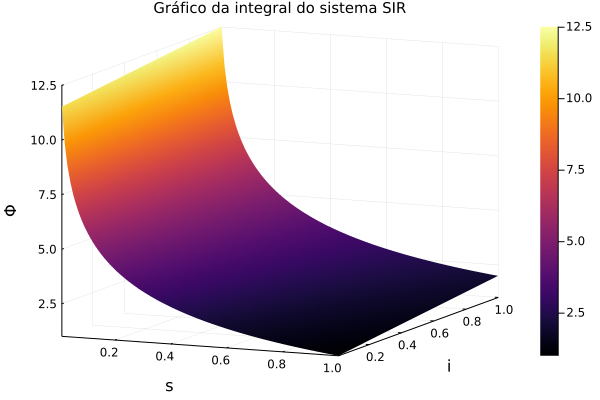

In [6]:
surface(0.01:0.01:1.0, 0.01:0.01:1.0, (s,i) -> Φ(s,i,β,γ))
plot!(title="Gráfico da integral do sistema SIR", titlefont=10,
    xlabel="s", ylabel="i", zlabel="Φ")

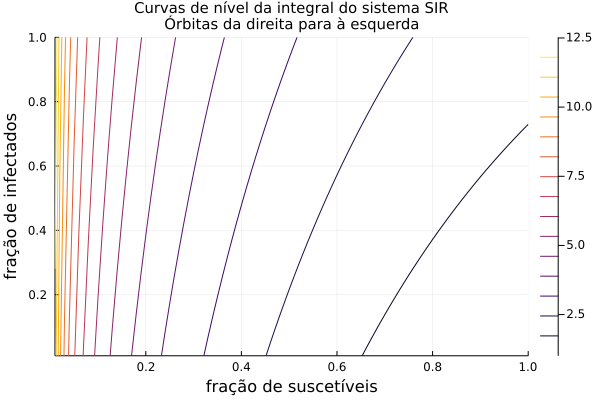

In [7]:
contour(0.01:0.01:1.0, 0.01:0.01:1.0, (s,i) -> Φ(s,i,β,γ))
plot!(title="Curvas de nível da integral do sistema SIR\nÓrbitas da direita para à esquerda", titlefont=10,
    xlabel="fração de suscetíveis", ylabel="fração de infectados")

Finalmente, definimos os parâmetros, a integral associada a esses parâmetros e traçamos as curvas de nível da integral, que contém as soluções.

Observe que as soluções se movem ao longo das curvas de nível e sempre da direita para a esquerda (casos suscetíveis decrescendo).

### Exemplo sintético com epidemia 

Tomamos, agora, $\beta =0.4$ e $\gamma = 0.15$ (ambos por dia).

In [8]:
β = 0.4 # contágios por indivíduo, por dia
γ = 0.15 # uma semana aproximadamente
nothing

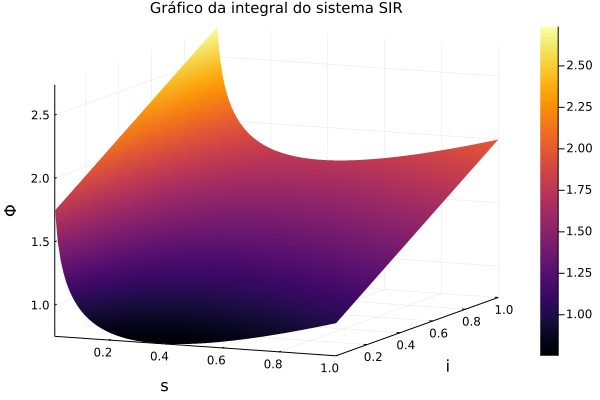

In [9]:
surface(0.01:0.01:1.0, 0.01:0.01:1.0, (s,i) -> Φ(s,i,β,γ))
plot!(title="Gráfico da integral do sistema SIR", titlefont=10,
    xlabel="s", ylabel="i", zlabel="Φ")

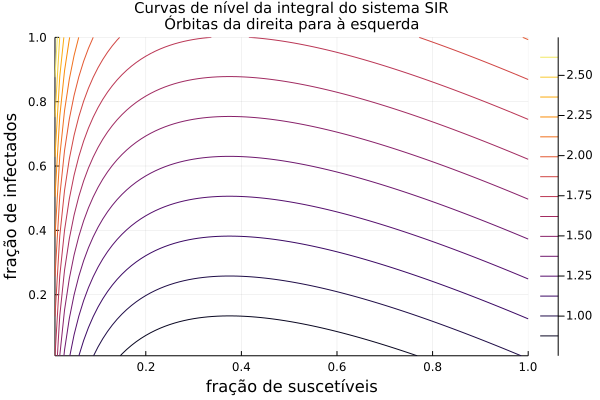

In [10]:
contour(0.01:0.01:1.0, 0.01:0.01:1.0, (s,i) -> Φ(s,i,β,γ))
plot!(title="Curvas de nível da integral do sistema SIR\nÓrbitas da direita para à esquerda", titlefont=10,
    xlabel="fração de suscetíveis", ylabel="fração de infectados")

## Implementação numérica da resolução do sistema de equações diferenciais

Vamos usar o pacote [SciML/DifferentialEquations.jl](https://github.com/SciML/DifferentialEquations.jl) para a resolução do sistema de EDOs.

### Parâmetros e dados iniciais

In [11]:
# população total
N = 1000

# população inicial em cada estágio
S0 = 0.9*N # suscetíveis
I0 = 0.1*N # infectados
R0 = N - S0 - I0 # recuperados

# parâmetros
β = 0.4 # taxa de transmissão por dia
γ = 0.15 # taxa de recuperação por dia
nothing

### Verificando condição para a existência de epidemia

No exemplo, temos o número básico de reprodução

$$ \mathcal{R}_0 = \frac{\beta}{\gamma} \approx 2.7
$$

Para termos uma situação de epidemia, devemos ter, ainda,

$$ \frac{S_0 \beta}{\gamma N} > 1
$$

No exemplo, temos

In [12]:
println("ℛ₀ = (β/γ) = $(β/γ)")
println("(S₀β)/(γN) = $(S0 * β / γ / N)")

ℛ₀ = (β/γ) = 2.666666666666667
(S₀β)/(γN) = 2.4


### Função taxa de evolução

In [13]:
function dudt_SIR!(du, u, p, t)
    N, β, γ = p
    S, I = u
    R = N - S - I
    I_nov = β * I * S / N # novos infectados
    du[1] = - I_nov
    du[2] = I_nov - γ * I
end

dudt_SIR! (generic function with 1 method)

### Resolvendo o sistema

In [14]:
# populacao inicial para o sistema reduzido
u0 = [S0, I0]
# intervalo de tempo
tspan = (0.0, 60.0)
# parâmetros
p = [N, β, γ]
# Problema de valor inicial
prob = ODEProblem(dudt_SIR!, u0, tspan, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 60.0)
u0: 2-element Vector{Float64}:
 900.0
 100.0

In [15]:
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 16-element Vector{Float64}:
  0.0
  0.14591912646339136
  1.1998977523331642
  3.202123395097491
  5.872618256400144
  8.474577860586276
 11.755592849648778
 15.90117637893665
 20.09397725856809
 24.990111381318425
 30.87028566555766
 36.92541427280823
 43.05515914996209
 49.39726821779145
 55.85366593669352
 60.0
u: 16-element Vector{Vector{Float64}}:
 [900.0, 100.0]
 [894.6816501333566, 103.09579742911444]
 [852.3698983628218, 127.23978502762576]
 [754.1290260104812, 179.55923618932607]
 [599.4001475324234, 248.17554479894525]
 [451.6544098039546, 289.7921212787867]
 [306.92627231781177, 289.6526413467724]
 [197.8379042645635, 234.06411361304615]
 [141.675384942537, 165.01916859530337]
 [109.61482857386598, 100.86908587017844]
 [91.9982364066042, 52.77671970128586]
 [83.89483556092388, 26.299340275463706]
 [80.1217014136505, 12.81488763144928]
 [78.31007160540777, 6.049737712507739]
 [77.4604377522188, 2.80845

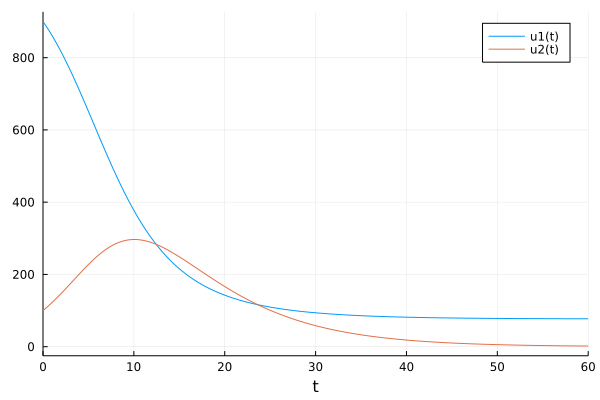

In [16]:
plot(sol)

### Extraindo as informações

In [17]:
tempos = 0.0:60.0
S_model, I_model = hcat(sol(tempos)...) |> x -> (x[1,:], x[2,:])
R_model = N .- S_model .- I_model
IR_model = I_model + R_model
nothing

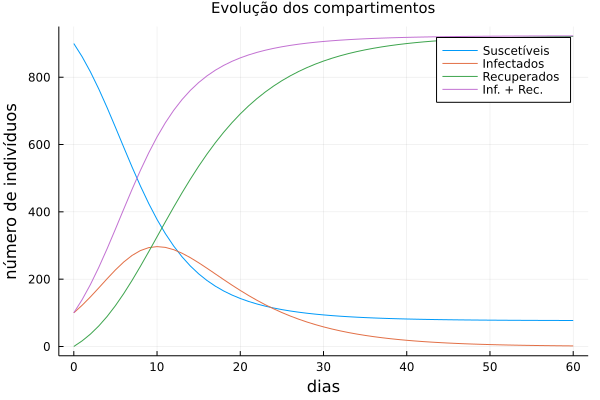

In [18]:
plot(tempos, S_model, label="Suscetíveis")
plot!(tempos, I_model, label="Infectados")
plot!(tempos, R_model, label="Recuperados")
plot!(tempos, IR_model, label="Inf. + Rec.")
plot!(title="Evolução dos compartimentos", titlefont=10,
    xlabel="dias", ylabel="número de indivíduos")

### Caso sem epidemia

Vamos considerar, agora, um caso em que $\mathcal{R}_0\leq 1$, de modo que a condição para a existência de epidemia não é satisfeita.

In [19]:
# parâmetros
β = 0.2 # taxa de transmissão por dia
γ = 0.25 # taxa de recuperação por dia

0.25

In [20]:
println("ℛ₀ = (β/γ) = $(β/γ)")
println("(S₀β)/(γN) = $(S0 * β / γ / N)")

ℛ₀ = (β/γ) = 0.8
(S₀β)/(γN) = 0.72


In [21]:
p = [N, β, γ]
prob = ODEProblem(dudt_SIR!, u0, tspan, p)
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 13-element Vector{Float64}:
  0.0
  0.18099901978600483
  1.9050034065541737
  5.281643364452064
  9.656150278782711
 15.614757078058553
 20.93837288791802
 27.160388115147892
 33.42271015788106
 40.13483539739953
 46.9983760499781
 54.111713149310276
 60.0
u: 13-element Vector{Vector{Float64}}:
 [900.0, 100.0]
 [896.7684486854379, 98.73520844783016]
 [868.5260770562204, 86.97748217142882]
 [824.9080796130605, 66.18842298317377]
 [786.1810897639937, 44.80938114039053]
 [754.7750905808031, 25.255779919213264]
 [739.2075785285515, 14.771882771226487]
 [729.240306314639, 7.769693061725427]
 [724.0516902676732, 4.032598788179326]
 [721.2476737104832, 1.9863526226978208]
 [719.8512416609949, 0.9602650528655498]
 [719.1611630925648, 0.4514663017771156]
 [718.8769447952079, 0.2415767457444399]

In [22]:
tempos = 0.0:60.0
S_model, I_model = hcat(sol(tempos)...) |> x -> (x[1,:], x[2,:])
R_model = N .- S_model .- I_model
IR_model = I_model + R_model
nothing

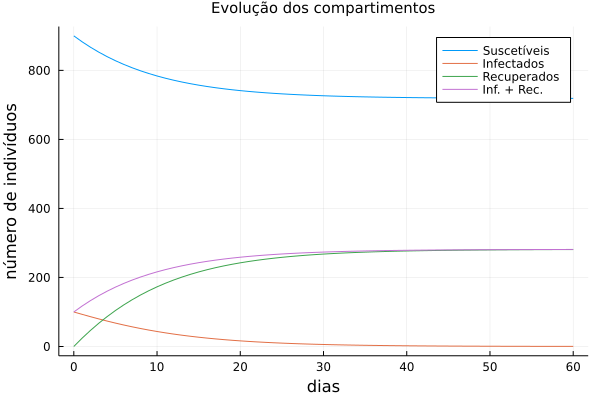

In [23]:
plot(tempos, S_model, label="Suscetíveis")
plot!(tempos, I_model, label="Infectados")
plot!(tempos, R_model, label="Recuperados")
plot!(tempos, IR_model, label="Inf. + Rec.")
plot!(title="Evolução dos compartimentos", titlefont=10,
    xlabel="dias", ylabel="número de indivíduos")

### Taxa nominal de infecção com saturação

Em situações de uma alta proporção de infectados, levando em consideração questões de aglomeração dos infectados e medidas preventivas dos suscetíveis, foram propostas modificações na taxas nominal de infecção, substituindo o termo $\beta is$ (que veremos a seguir) por

$$ \beta \frac{s i^p}{1 + ki^q}
$$

com $p, q, k>0$.

## Exercícios

Considerando o modelos SIR:

1. Mostre que, se $S(0) \approx N$, então $\mathcal{R}_0$ é dado por 
$$ \mathcal{R}_0 \approx \frac{\ln s_*}{1-s_*} = \frac{N}{N - S_*}\ln \frac{N}{S_*},
$$
onde $S_* = \lim_{t\rightarrow \infty} S(t)$.

Considerando o modelo SIS:

2. Escreva o sistema de duas equações diferenciais para $S$ e $I$ e as suas versões $s$ e $i$ por densidade populacional.

2. Usando que a população $S + I$ é constante, reduza o sistema em $s$ e $i$ para uma única equação diferencial em $i$.

2. Ache os pontos fixos dessa equação diferencial em $i$.

2. Trace as linhas de fase dessa equação diferencial em $i$.

2. Determine uma condição necessária e suficiente, em termos de $i(0)$, $\beta$ e $\gamma$ para que haja epidemia em um intervalo iniciando em $t=0$.

2. Ache o número básico de reprodução $\mathcal{R}_0$ para esse sistema, em função de $\beta$ e $\gamma$ e tal que $\mathcal{R}_0>1$ é uma condição necessária para a existência de um epidemia.

2. Faça simulações numéricas dos casos típicos do modelo, i.e. com e sem epidemia.

### Referências

- [W. O. Kermack & A. G. McKendrick (1927, 1932, 1933).](https://en.wikipedia.org/wiki/Kermack%E2%80%93McKendrick_theory)
- [K.-H. Yang & J.-Y. Hsu (2012) A New SIR-based Model for Influenza Epidemic, *International Journal of Health and Medical Engineering,* Vol:6, No:7, World Academy of Science, Engineering and Technology.](https://zenodo.org/record/1054948#.Xoj1NdNKiRt)
- [W. H. Herbert (2000), The mathematics of infectious diseases; *SIAM Review* 42, 599–653.](https://epubs.siam.org/doi/10.1137/S0036144500371907)
- [J. Jia, J. Ding, S. Liu, G. Liao, J. Li, B. Duan, G. Wang, & R. Zhang (2020), Modeling the control of COVID-19: impact of policy interventions and meteorological factors, *Electronic Journal of Differential Equations,* Vol. 2020, No. 23, pp. 1–24.](https://ejde.math.txstate.edu/)
- [M. J. Keeling & P. Rohani (2007), *Modeling Infectious Diseases in Humans and Animals,* Princeton University Press.](https://press.princeton.edu/books/hardcover/9780691116174/modeling-infectious-diseases-in-humans-and-animals)
- [G. Zaman, Y. H. Kang, & I. H. Jung (2008), Stability analysis and optimal vaccination of an SIR epidemic mode, *Biosystems*, 93, 240-249.](https://www.sciencedirect.com/science/article/abs/pii/S0303264708001044)
- [F. Brauer & C. Castillo-Chavez (2012), *Mathematical Models in Population Biology and Epidemiology*, Texts in Applied Mathematics (Book 40), Springer-Verlag, 2nd. edition.](https://link.springer.com/book/10.1007/978-1-4614-1686-9)